In [2]:
from SPC_2L.DataTools import DataBase, to_img, show
import pickle
from SPC_2L.Network import LayerPC, Network
from SPC_2L.Coding import ML_FISTA, ML_Lasso
import torch.nn.functional as f
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid, save_image
import torch
from torchvision.transforms import ToTensor,Compose, Resize
from SPC_2L.DataTools import LCN, whitening, z_score, mask, to_cuda, norm
from torch.utils.data import DataLoader
from torchvision.datasets import STL10
from LogGabor import LogGaborFit

cmap1=plt.get_cmap('tab20c')
cmap2=plt.get_cmap('tab20b')
print(torch.__version__)

1.0.1.post2


## Assessing Mean coverage surface

### CFD database

### 2nd  Layer

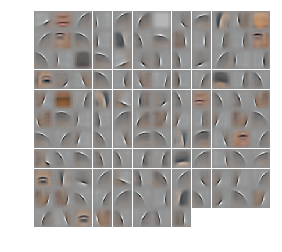

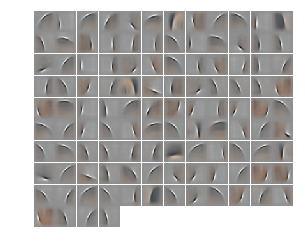

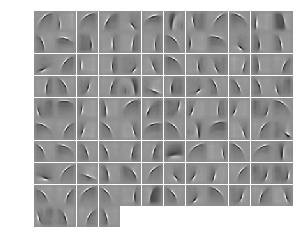

tensor(0.1676, device='cuda:0')


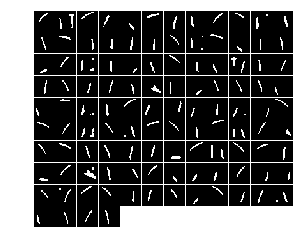

mean surface coverage 2LSPC : 4.47%


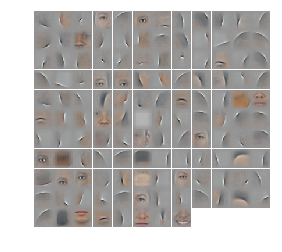

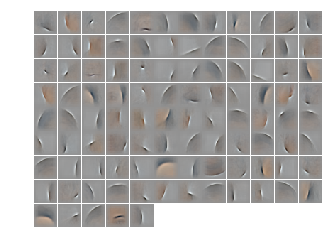

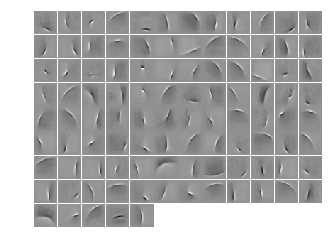

tensor(0.1277, device='cuda:0')


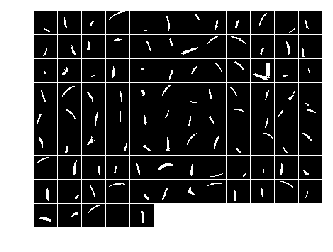

mean surface coverage HiLa : 3.17%


In [3]:
where = 'Savings/CFD/'
model_name = 'CFD_[0.3,1.8]_b=1.pkl'
path = where + model_name
with open(path, 'rb') as file:
    out = pickle.load(file)
Net = out['Net']

std1 = 0.1680
std2 = 0.1277

crit_0 = 0.12
crit_0 = (std1 + std2)/2

grid_param = {'padding':1, 'normalize':True, 
                            'pad_value':1, 
                            'nrow':12, 'scale_each':False}
dico1 = Net.layers[0].backward(Net.layers[1].dico).clone() 
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

filt_2LSPC = torch.arange(128)
filt_2LSPC = torch.cat([filt_2LSPC[1+1:6], filt_2LSPC[6+1:11], filt_2LSPC[11+1:13], \
                        filt_2LSPC[13+1:23], filt_2LSPC[23+1:26],filt_2LSPC[26+1:28], filt_2LSPC[28+1:36],filt_2LSPC[36+1:45],\
                        filt_2LSPC[45+1:49],filt_2LSPC[49+1:56],filt_2LSPC[56+1:82],filt_2LSPC[82+1:96],\
                        filt_2LSPC[96+1:122], filt_2LSPC[122+1:-1]\

#filt_2LSPC = torch.cat([filt_2LSPC[0:1], filt_2LSPC[1+1:6], filt_2LSPC[6+1:11], filt_2LSPC[11+1:13], \
#                        filt_2LSPC[13+1:23], filt_2LSPC[23+1:26],filt_2LSPC[26+1:36],filt_2LSPC[36+1:45],\
#                        filt_2LSPC[45+1:49],filt_2LSPC[49+1:56],filt_2LSPC[56+1:82],filt_2LSPC[82+1:96],\
#                        filt_2LSPC[96+1:122], filt_2LSPC[122+1:-1]\
                       ])
dico1 = dico1[filt_2LSPC]

img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

dico1_bw = torch.mean(dico1,dim=1).unsqueeze(1)
dico1_bw = dico1_bw/dico1_bw.max()
img2 = make_grid(dico1_bw,**grid_param)
plot_L2 = show(img2.cpu())

print(dico1_bw.std())

dico1_binarized = dico1_bw.clone()
dico1_binarized[dico1_binarized < crit_0] = 0
dico1_binarized[dico1_binarized >= crit_0] = 1
img2 = make_grid(dico1_binarized,**grid_param)
plot_L2 = show(img2.cpu())



msc = dico1_binarized.mean()
print('mean surface coverage 2LSPC : {0:0.2f}%'.format(msc*100))

where = 'Savings/CFD/'
model_name = 'CFD_[0.3,1.8]_b=0.pkl'
path = where + model_name
with open(path, 'rb') as file:
    out = pickle.load(file)
Net = out['Net']

grid_param = {'padding':1, 'normalize':True, 
                            'pad_value':1, 
                            'nrow':12, 'scale_each':False}
dico1 = Net.layers[0].backward(Net.layers[1].dico).clone() 
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())


filt_HiLa = torch.arange(128)
filt_HiLa = torch.cat([filt_HiLa[0:3], filt_HiLa[3+1:5], filt_HiLa[5+1:14], filt_HiLa[14+1:33],\
                       filt_HiLa[33+1:39],filt_HiLa[40+1:55], filt_HiLa[55+1:58],filt_HiLa[60+1:63], \
                       filt_HiLa[63+1:65], filt_HiLa[65+1:77],filt_HiLa[77+1:80], filt_HiLa[80+1:84], \
                       filt_HiLa[85+1:89],filt_HiLa[89+1:97],filt_HiLa[98+1:101],filt_HiLa[101+1:103], \
                       filt_HiLa[103+1:113],filt_HiLa[113+1:121],filt_HiLa[122+1:125],filt_HiLa[125+1:-2]])
dico1 = dico1[filt_HiLa]
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

dico1_bw = torch.mean(dico1,dim=1).unsqueeze(1)
dico1_bw = dico1_bw/dico1_bw.max()
img2 = make_grid(dico1_bw,**grid_param)
plot_L2 = show(img2.cpu())

print(dico1_bw.std())

dico1_binarized = dico1_bw.clone()
dico1_binarized[dico1_binarized < crit_0] = 0
dico1_binarized[dico1_binarized >= crit_0] = 1
img2 = make_grid(dico1_binarized,**grid_param)
plot_L2 = show(img2.cpu())

msc = dico1_binarized.mean()
print('mean surface coverage HiLa : {0:0.2f}%'.format(msc*100))



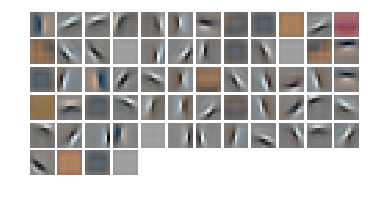

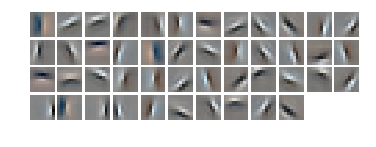

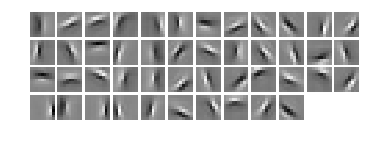

tensor(0.2518, device='cuda:0')


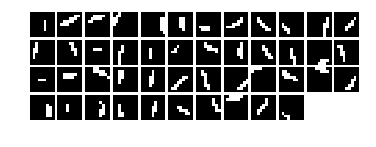

mean surface coverage 2LSPC : 9.42%


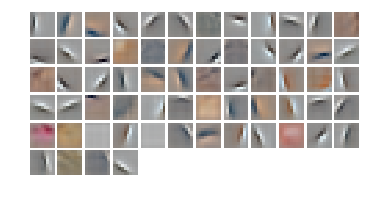

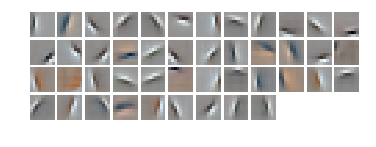

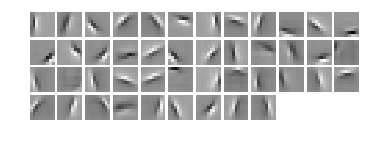

tensor(0.2680, device='cuda:0')


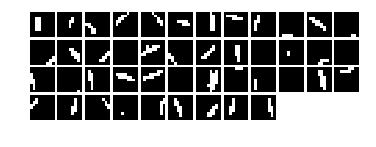

mean surface coverage HiLa : 8.45%


In [4]:
where = 'Savings/CFD/'
model_name = 'CFD_[0.3,1.8]_b=1.pkl'
path = where + model_name
with open(path, 'rb') as file:
    out = pickle.load(file)
Net = out['Net']

std1 = 0.2518
std2 = 0.2680

crit0=0.15
crit0 = (std1 + std2)/2

grid_param = {'padding':1, 'normalize':True, 
                            'pad_value':1, 
                            'nrow':12, 'scale_each':False}
dico1 = Net.layers[0].dico
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

filt_2LSPC = torch.arange(64)
filt_2LSPC = torch.cat([filt_2LSPC[0:7], filt_2LSPC[9+1:11], filt_2LSPC[12+1:15], filt_2LSPC[15+1:19], \
                        filt_2LSPC[19+1:21],filt_2LSPC[22+1:24],filt_2LSPC[24+1:30],filt_2LSPC[30+1:36],\
                        filt_2LSPC[36+1:38],filt_2LSPC[38+1:43],filt_2LSPC[43+1:52], filt_2LSPC[52+1:-3]])
dico1 = dico1[filt_2LSPC]

img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

dico1_bw = torch.mean(dico1,dim=1).unsqueeze(1)
dico1_bw = dico1_bw/dico1_bw.max()
img2 = make_grid(dico1_bw,**grid_param)
plot_L2 = show(img2.cpu())

print(dico1_bw.std())

dico1_binarized = dico1_bw.clone()
crit = 1.5*dico1_binarized.std()
dico1_binarized[dico1_binarized < crit0] = 0
dico1_binarized[dico1_binarized >= crit0] = 1
img2 = make_grid(dico1_binarized,**grid_param)
plot_L2 = show(img2.cpu())



msc = dico1_binarized.mean()
print('mean surface coverage 2LSPC : {0:0.2f}%'.format(msc*100))


where = 'Savings/CFD/'
model_name = 'CFD_[0.3,1.8]_b=0.pkl'
path = where + model_name
with open(path, 'rb') as file:
    out = pickle.load(file)
Net = out['Net']

grid_param = {'padding':1, 'normalize':True, 
                            'pad_value':1, 
                            'nrow':12, 'scale_each':False}
dico1 = Net.layers[0].dico
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())


filt_HiLa = torch.arange(64)
filt_HiLa = torch.cat([filt_HiLa[0:2],filt_HiLa[2+1:6], filt_HiLa[6+1:11], filt_HiLa[11+1:15], \
                       filt_HiLa[17+1:19],filt_HiLa[19+1:24],filt_HiLa[24+1:30],filt_HiLa[30+1:39],\
                       filt_HiLa[39+1:42],filt_HiLa[42+1:48],filt_HiLa[50+1:52], filt_HiLa[52+1:57],\
                       filt_HiLa[57+1:61],filt_HiLa[62+1:-1]])
dico1 = dico1[filt_HiLa]
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

dico1_bw = torch.mean(dico1,dim=1).unsqueeze(1)
dico1_bw = dico1_bw/dico1_bw.max()
img2 = make_grid(dico1_bw,**grid_param)
plot_L2 = show(img2.cpu())

print(dico1_bw.std())

dico1_binarized = dico1_bw.clone()
crit = 1.5*dico1_binarized.std()
dico1_binarized[dico1_binarized < crit0] = 0
dico1_binarized[dico1_binarized >= crit0] = 1
img2 = make_grid(dico1_binarized,**grid_param)
plot_L2 = show(img2.cpu())

msc = dico1_binarized.mean()
print('mean surface coverage HiLa : {0:0.2f}%'.format(msc*100))




In [5]:
## STL Database

In [6]:
### 2nd Layer

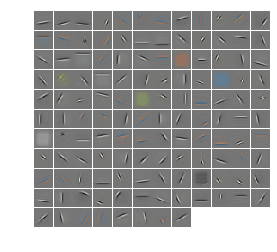

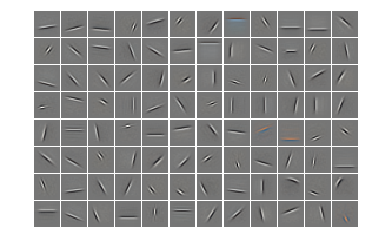

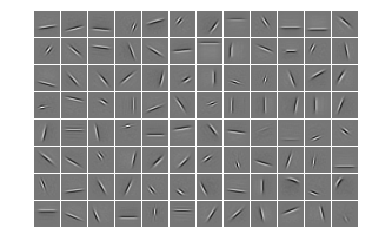

tensor(0.0912, device='cuda:0')


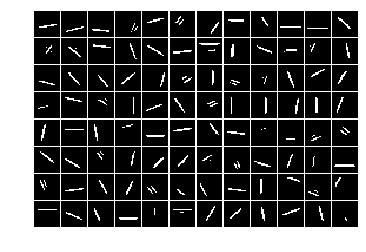

mean surface coverage 2LSPC : 3.87%


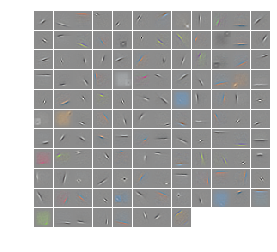

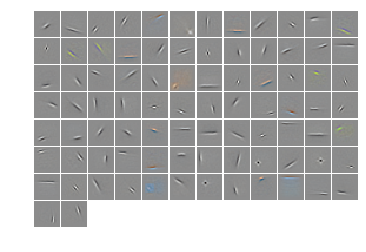

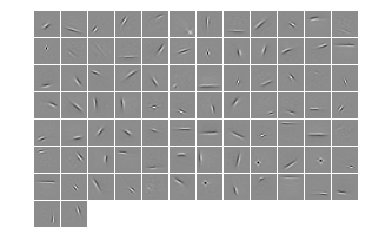

tensor(0.0695, device='cuda:0')


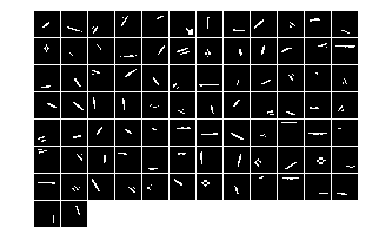

mean surface coverage HiLa : 2.55%


In [7]:
where = 'Savings/STL/'
model_name = 'STL_[0.4,1.8]_b=1.pkl'
path = where + model_name
with open(path, 'rb') as file:
    out = pickle.load(file)
Net = out['Net']

std1 = 0.0912
std2 = 0.0695

crit0 = 0.06
crit0 = (std1+std2)/2 

grid_param = {'padding':1, 'normalize':True, 
                            'pad_value':1, 
                            'nrow':12, 'scale_each':False}
dico1 = Net.layers[0].backward(Net.layers[1].dico).clone() 
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

filt_2LSPC = torch.arange(128)
filt_2LSPC = torch.cat([filt_2LSPC[0:4], filt_2LSPC[6+1:8], filt_2LSPC[8+1:10], filt_2LSPC[10+1:13], \
                        filt_2LSPC[15+1:27],filt_2LSPC[27+1:30],filt_2LSPC[31+1:37],filt_2LSPC[37+1:39],\
                        filt_2LSPC[39+1:45],filt_2LSPC[45+1:52],filt_2LSPC[53+1:56], filt_2LSPC[56+1:62],\
                        filt_2LSPC[63+1:65],filt_2LSPC[65+1:68],filt_2LSPC[68+1:72], filt_2LSPC[72+1:76],\
                        filt_2LSPC[77+1:83],filt_2LSPC[83+1:94],filt_2LSPC[94+1:96], filt_2LSPC[97+1:104],\
                        filt_2LSPC[104+1:122], filt_2LSPC[123+1:-1]])
dico1 = dico1[filt_2LSPC]

img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

dico1_bw = torch.mean(dico1,dim=1).unsqueeze(1)
dico1_bw = dico1_bw/dico1_bw.max()
img2 = make_grid(dico1_bw,**grid_param)
plot_L2 = show(img2.cpu())

print(dico1_bw.std())

dico1_binarized = dico1_bw.clone()
crit = 1.5*dico1_binarized.std()
dico1_binarized[dico1_binarized < crit0] = 0
dico1_binarized[dico1_binarized >= crit0] = 1
img2 = make_grid(dico1_binarized,**grid_param)
plot_L2 = show(img2.cpu())



msc = dico1_binarized.mean()
print('mean surface coverage 2LSPC : {0:0.2f}%'.format(msc*100))

where = 'Savings/STL/'
model_name = 'STL_[0.4,1.8]_b=0.pkl'
path = where + model_name
with open(path, 'rb') as file:
    out = pickle.load(file)
Net = out['Net']

grid_param = {'padding':1, 'normalize':True, 
                            'pad_value':1, 
                            'nrow':12, 'scale_each':False}
dico1 = Net.layers[0].backward(Net.layers[1].dico).clone() 
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())


filt_HiLa = torch.arange(128)
filt_HiLa = torch.cat([filt_HiLa[0:2], filt_HiLa[3+1:9], filt_HiLa[9+1:15], filt_HiLa[16+1:20],\
                       filt_HiLa[21+1:29],filt_HiLa[29+1:3], filt_HiLa[34+1:39],filt_HiLa[41+1:45], \
                       filt_HiLa[45+1:55], filt_HiLa[55+1:57],filt_HiLa[57+1:60], filt_HiLa[61+1:63], \
                       filt_HiLa[63+1:69],filt_HiLa[69+1:77],filt_HiLa[77+1:82],filt_HiLa[82+1:84], \
                       filt_HiLa[84+1:88],filt_HiLa[88+1:92],filt_HiLa[94+1:101],filt_HiLa[101+1:104],\
                       filt_HiLa[106+1:109],filt_HiLa[110+1:114],filt_HiLa[114+1:117],filt_HiLa[117+1:120],\
                       filt_HiLa[120+1:124], filt_HiLa[124+1:-2]])
dico1 = dico1[filt_HiLa]
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

dico1_bw = torch.mean(dico1,dim=1).unsqueeze(1)
dico1_bw = dico1_bw/dico1_bw.max()
img2 = make_grid(dico1_bw,**grid_param)
plot_L2 = show(img2.cpu())

print(dico1_bw.std())

dico1_binarized = dico1_bw.clone()
crit = 1.5*dico1_binarized.std()
dico1_binarized[dico1_binarized < crit0] = 0
dico1_binarized[dico1_binarized >= crit0] = 1
img2 = make_grid(dico1_binarized,**grid_param)
plot_L2 = show(img2.cpu())

msc = dico1_binarized.mean()
print('mean surface coverage HiLa : {0:0.2f}%'.format(msc*100))




In [8]:
### 1st Layer

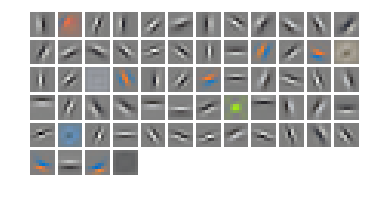

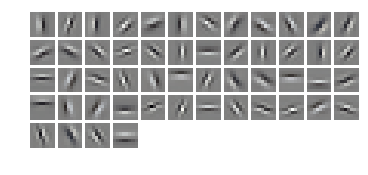

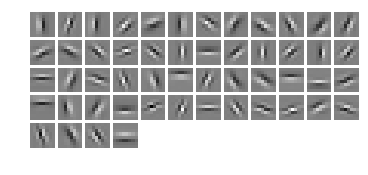

tensor(0.1993, device='cuda:0')


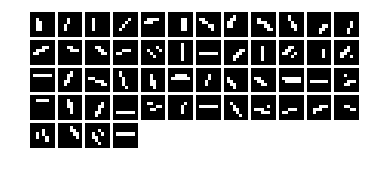

mean surface coverage 2LSPC : 9.53%


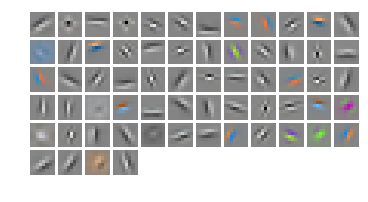

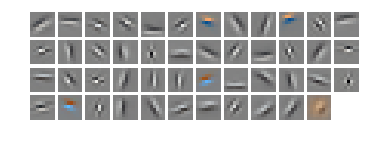

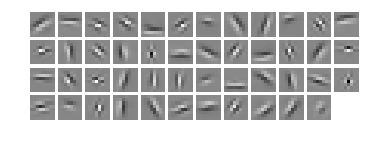

tensor(0.1791, device='cuda:0')


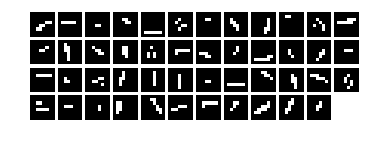

mean surface coverage HiLa : 7.95%


In [9]:
where = 'Savings/STL/'
model_name = 'STL_[0.4,1.8]_b=1.pkl'
path = where + model_name
with open(path, 'rb') as file:
    out = pickle.load(file)
Net = out['Net']

std1 = 0.1993
std2 = 0.1791

crit0 = 0.15
crit0 = (std1+std2)/2 

grid_param = {'padding':1, 'normalize':True, 
                            'pad_value':1, 
                            'nrow':12, 'scale_each':False}
dico1 = Net.layers[0].dico
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

filt_2LSPC = torch.arange(64)
filt_2LSPC = torch.cat([filt_2LSPC[0:1], filt_2LSPC[1+1:20], filt_2LSPC[20+1:22], filt_2LSPC[23+1:26], \
                        filt_2LSPC[27+1:30],filt_2LSPC[30+1:43],filt_2LSPC[43+1:49],filt_2LSPC[49+1:60],\
                        filt_2LSPC[60+1:-2]])
dico1 = dico1[filt_2LSPC]

img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

dico1_bw = torch.mean(dico1,dim=1).unsqueeze(1)
dico1_bw = dico1_bw/dico1_bw.max()
img2 = make_grid(dico1_bw,**grid_param)
plot_L2 = show(img2.cpu())

print(dico1_bw.std())

dico1_binarized = dico1_bw.clone()
crit = 1.5*dico1_binarized.std()
dico1_binarized[dico1_binarized < crit0] = 0
dico1_binarized[dico1_binarized >= crit0] = 1
img2 = make_grid(dico1_binarized,**grid_param)
plot_L2 = show(img2.cpu())



msc = dico1_binarized.mean()
print('mean surface coverage 2LSPC : {0:0.2f}%'.format(msc*100))


where = 'Savings/STL/'
model_name = 'STL_[0.4,1.8]_b=0.pkl'
path = where + model_name
with open(path, 'rb') as file:
    out = pickle.load(file)
Net = out['Net']

grid_param = {'padding':1, 'normalize':True, 
                            'pad_value':1, 
                            'nrow':12, 'scale_each':False}
dico1 = Net.layers[0].dico
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())


filt_HiLa = torch.arange(64)
filt_HiLa = torch.cat([filt_HiLa[0:1],filt_HiLa[1+1:3], filt_HiLa[3+1:7], filt_HiLa[8+1:12], \
                       filt_HiLa[12+1:19],filt_HiLa[19+1:24],filt_HiLa[24+1:33],filt_HiLa[33+1:38],\
                       filt_HiLa[38+1:47],filt_HiLa[48+1:52],filt_HiLa[52+1:55], filt_HiLa[55+1:57],\
                       filt_HiLa[59+1:-1]])
dico1 = dico1[filt_HiLa]
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

dico1_bw = torch.mean(dico1,dim=1).unsqueeze(1)
dico1_bw = dico1_bw/dico1_bw.max()
img2 = make_grid(dico1_bw,**grid_param)
plot_L2 = show(img2.cpu())

print(dico1_bw.std())

dico1_binarized = dico1_bw.clone()
crit = 1.5*dico1_binarized.std()
dico1_binarized[dico1_binarized < crit0] = 0
dico1_binarized[dico1_binarized >= crit0] = 1
img2 = make_grid(dico1_binarized,**grid_param)
plot_L2 = show(img2.cpu())

msc = dico1_binarized.mean()
print('mean surface coverage HiLa : {0:0.2f}%'.format(msc*100))





In [10]:
## MNIST Database

In [11]:
### 2nd Layer

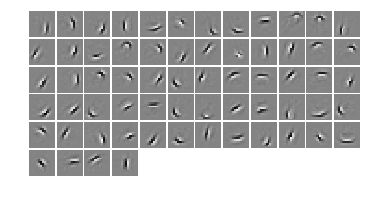

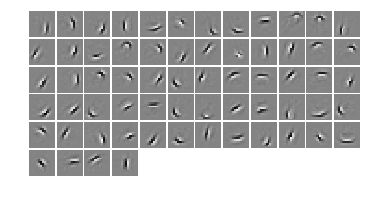

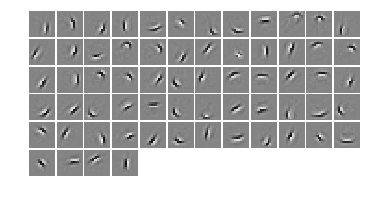

tensor(0.1609, device='cuda:0')


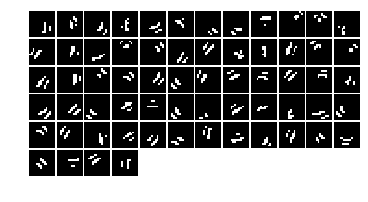

mean surface coverage 2LSPC : 5.83%


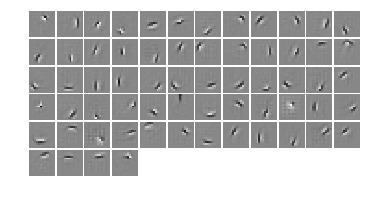

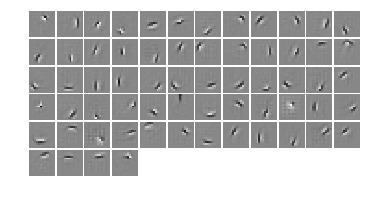

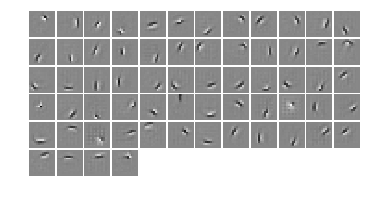

tensor(0.1182, device='cuda:0')


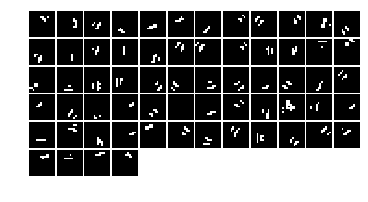

mean surface coverage HiLa : 3.81%


In [12]:
where = 'Savings/MNIST/'
model_name = 'MNIST_[0.20,0.30]_b=1.pkl'
path = where + model_name
with open(path, 'rb') as file:
    out = pickle.load(file)
Net = out['Net']

std1 = 0.1609
std2 = 0.1182

crit0 = 0.15
crit0 = (std1+std2)/2

grid_param = {'padding':1, 'normalize':True, 
                            'pad_value':1, 
                            'nrow':12, 'scale_each':False}
dico1 = Net.layers[0].backward(Net.layers[1].dico).clone() 
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

filt_2LSPC = torch.arange(64)
#filt_2LSPC = torch.cat([filt_2LSPC[0:4], filt_2LSPC[6+1:8], filt_2LSPC[8+1:10], filt_2LSPC[10+1:13], \
#                        filt_2LSPC[15+1:27],filt_2LSPC[27+1:30],filt_2LSPC[31+1:37],filt_2LSPC[37+1:39],\
#                        filt_2LSPC[39+1:45],filt_2LSPC[45+1:52],filt_2LSPC[53+1:56], filt_2LSPC[56+1:62],\
#                        filt_2LSPC[63+1:65],filt_2LSPC[65+1:68],filt_2LSPC[68+1:72], filt_2LSPC[72+1:76],\
#                        filt_2LSPC[77+1:83],filt_2LSPC[83+1:94],filt_2LSPC[94+1:96], filt_2LSPC[97+1:104],\
#                        filt_2LSPC[104+1:122], filt_2LSPC[123+1:-1]])
#dico1 = dico1[filt_2LSPC]

img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

#dico1_bw = torch.mean(dico1,dim=1).unsqueeze(1)
#dico1_bw = 1/dico1
#dico1 = 1 - dico1
dico1_bw = dico1/dico1.max()
#dico1_bw = dico1/dico1_bw.max()
img2 = make_grid(dico1_bw,**grid_param)
plot_L2 = show(img2.cpu())

print(dico1_bw.std())

dico1_binarized = dico1_bw.clone()
crit = 1.5*dico1_binarized.std()
dico1_binarized[dico1_binarized >= crit0] = 1
dico1_binarized[dico1_binarized < crit0] = 0
#dico1_binarized[dico1_binarized > 0.58] = 1
#dico1_binarized[dico1_binarized <= 0.58] = 0
img2 = make_grid(dico1_binarized,**grid_param)
plot_L2 = show(img2.cpu())



msc = dico1_binarized.mean()
print('mean surface coverage 2LSPC : {0:0.2f}%'.format(msc*100))

where = 'Savings/MNIST/'
model_name = 'MNIST_[0.20,0.30]_b=0.pkl'
path = where + model_name
with open(path, 'rb') as file:
    out = pickle.load(file)
Net = out['Net']

grid_param = {'padding':1, 'normalize':True, 
                            'pad_value':1, 
                            'nrow':12, 'scale_each':False}
dico1 = Net.layers[0].backward(Net.layers[1].dico).clone() 
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())


#filt_HiLa = torch.arange(64)
#filt_HiLa = torch.cat([filt_HiLa[0:36], filt_HiLa[36+1:-1]])
#dico1 = dico1[filt_HiLa]
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

#dico1_bw = torch.mean(dico1,dim=1).unsqueeze(1)
#dico1 = 1 - dico1
dico1_bw = dico1/dico1.max()
img2 = make_grid(dico1_bw,**grid_param)
plot_L2 = show(img2.cpu())

print(dico1_bw.std())

dico1_binarized = dico1_bw.clone()

dico1_binarized[dico1_binarized >= crit0] = 1
dico1_binarized[dico1_binarized < crit0] = 0
#dico1_binarized[dico1_binarized < 0.58] = 0
#dico1_binarized[dico1_binarized >= 0.58] = 1
img2 = make_grid(dico1_binarized,**grid_param)
plot_L2 = show(img2.cpu())

msc = dico1_binarized.mean()
print('mean surface coverage HiLa : {0:0.2f}%'.format(msc*100))





In [13]:
### 1st Layer

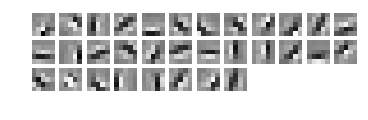

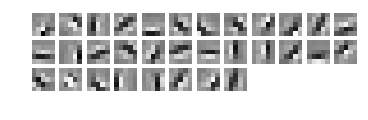

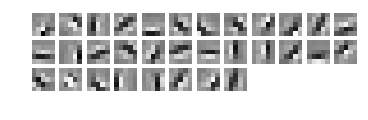

tensor(0.4003, device='cuda:0')


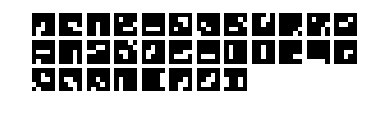

mean surface coverage 2LSPC : 14.62%


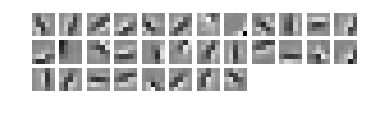

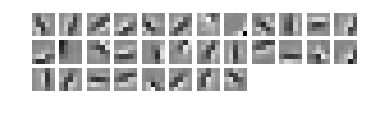

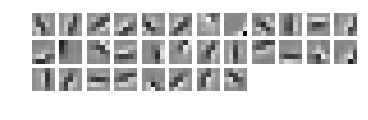

tensor(0.3292, device='cuda:0')


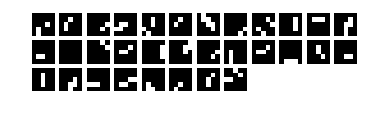

mean surface coverage HiLa : 12.12%


In [14]:
where = 'Savings/MNIST/'
model_name = 'MNIST_[0.20,0.30]_b=1.pkl'
path = where + model_name
with open(path, 'rb') as file:
    out = pickle.load(file)
Net = out['Net']

std1 = 0.40
std2 = 0.32

crit0 = (std1 + std2)/2
grid_param = {'padding':1, 'normalize':True, 
                            'pad_value':1, 
                            'nrow':12, 'scale_each':False}
dico1 = Net.layers[0].dico.clone()
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

filt_2LSPC = torch.arange(64)
#filt_2LSPC = torch.cat([filt_2LSPC[0:4], filt_2LSPC[6+1:8], filt_2LSPC[8+1:10], filt_2LSPC[10+1:13], \
#                        filt_2LSPC[15+1:27],filt_2LSPC[27+1:30],filt_2LSPC[31+1:37],filt_2LSPC[37+1:39],\
#                        filt_2LSPC[39+1:45],filt_2LSPC[45+1:52],filt_2LSPC[53+1:56], filt_2LSPC[56+1:62],\
#                        filt_2LSPC[63+1:65],filt_2LSPC[65+1:68],filt_2LSPC[68+1:72], filt_2LSPC[72+1:76],\
#                        filt_2LSPC[77+1:83],filt_2LSPC[83+1:94],filt_2LSPC[94+1:96], filt_2LSPC[97+1:104],\
#                        filt_2LSPC[104+1:122], filt_2LSPC[123+1:-1]])
#dico1 = dico1[filt_2LSPC]

img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

#dico1_bw = torch.mean(dico1,dim=1).unsqueeze(1)
#dico1_bw = 1/dico1
#dico1 = 1 - dico1
dico1_bw = dico1/dico1.max()
#dico1_bw = dico1/dico1_bw.max()
img2 = make_grid(dico1_bw,**grid_param)
plot_L2 = show(img2.cpu())

print(dico1_bw.std())

dico1_binarized = dico1_bw.clone()
crit = 1.5*dico1_binarized.std()

dico1_binarized[dico1_binarized < crit0] = 0
dico1_binarized[dico1_binarized >= crit0] = 1

#dico1_binarized[dico1_binarized > 0.72] = 1
#dico1_binarized[dico1_binarized <= 0.72] = 0
img2 = make_grid(dico1_binarized,**grid_param)
plot_L2 = show(img2.cpu())



msc = dico1_binarized.mean()
print('mean surface coverage 2LSPC : {0:0.2f}%'.format(msc*100))

where = 'Savings/MNIST/'
model_name = 'MNIST_[0.20,0.30]_b=0.pkl'
path = where + model_name
with open(path, 'rb') as file:
    out = pickle.load(file)
Net = out['Net']

grid_param = {'padding':1, 'normalize':True, 
                            'pad_value':1, 
                            'nrow':12, 'scale_each':False}
dico1 = Net.layers[0].dico.clone()
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())


#filt_HiLa = torch.arange(64)
#filt_HiLa = torch.cat([filt_HiLa[0:36], filt_HiLa[36+1:-1]])
#dico1 = dico1[filt_HiLa]
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

#dico1_bw = torch.mean(dico1,dim=1).unsqueeze(1)
#dico1 = 1 - dico1
dico1_bw = dico1/dico1.max()
img2 = make_grid(dico1_bw,**grid_param)
plot_L2 = show(img2.cpu())

print(dico1_bw.std())

dico1_binarized = dico1_bw.clone()

dico1_binarized[dico1_binarized < crit0] = 0
dico1_binarized[dico1_binarized >= crit0] = 1

#dico1_binarized[dico1_binarized < 0.72] = 0
#dico1_binarized[dico1_binarized >= 0.72] = 1

img2 = make_grid(dico1_binarized,**grid_param)
plot_L2 = show(img2.cpu())

msc = dico1_binarized.mean()
print('mean surface coverage HiLa : {0:0.2f}%'.format(msc*100))






In [15]:
## ATT Database

In [16]:
### 2nd Layer

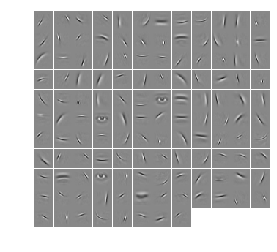

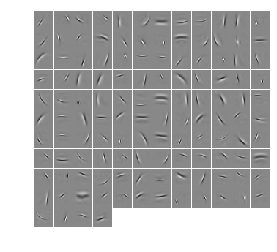

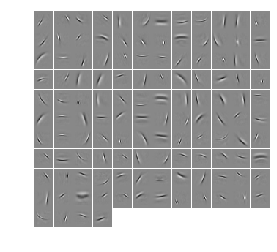

tensor(0.0984, device='cuda:0')


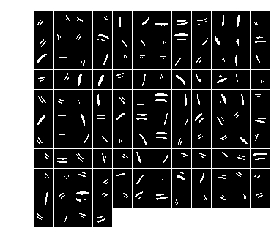

mean surface coverage 2LSPC : 4.27%


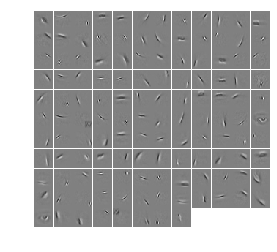

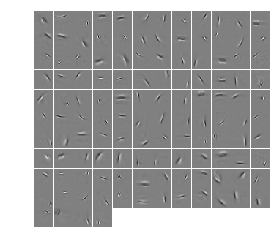

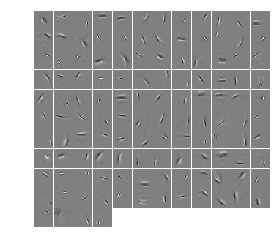

tensor(0.0774, device='cuda:0')


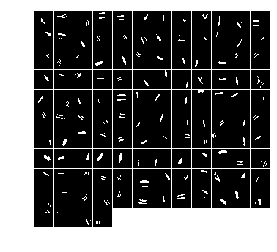

mean surface coverage HiLa : 3.06%


In [17]:
where = 'Savings/ATT/'
model_name = 'ATT_[0.5,1.0]_b=1.pkl'
path = where + model_name
with open(path, 'rb') as file:
    out = pickle.load(file)
Net = out['Net']

std1 = 0.0984
std2 = 0.0774

crit0 = (std1 + std2)/2
grid_param = {'padding':1, 'normalize':True, 
                            'pad_value':1, 
                            'nrow':12, 'scale_each':False}
dico1 = Net.layers[0].backward(Net.layers[1].dico).clone() 
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

filt_2LSPC = torch.arange(128)
filt_2LSPC = torch.cat([filt_2LSPC[0:54], filt_2LSPC[54+1:63], filt_2LSPC[63+1:99], filt_2LSPC[99+1:-1]])
dico1 = dico1[filt_2LSPC]

img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

#dico1_bw = torch.mean(dico1,dim=1).unsqueeze(1)
#dico1_bw = 1/dico1
dico1_bw = dico1/dico1.max()
#dico1_bw = 1 - dico1_bw

#dico1_bw = dico1/dico1.max()
img2 = make_grid(dico1_bw,**grid_param)
plot_L2 = show(img2.cpu())

print(dico1_bw.std())

dico1_binarized = dico1_bw.clone()
crit = 1.5*dico1_binarized.std()

#print(dico1[0,0,:,:])
dico1_binarized[dico1_binarized >= crit0] = 1
dico1_binarized[dico1_binarized < crit0] = 0
img2 = make_grid(dico1_binarized,**grid_param)
plot_L2 = show(img2.cpu())



msc = dico1_binarized.mean()
print('mean surface coverage 2LSPC : {0:0.2f}%'.format(msc*100))

where = 'Savings/ATT/'
model_name = 'ATT_[0.5,1.0]_b=0.pkl'
path = where + model_name
with open(path, 'rb') as file:
    out = pickle.load(file)
Net = out['Net']

grid_param = {'padding':1, 'normalize':True, 
                            'pad_value':1, 
                            'nrow':12, 'scale_each':False}
dico1 = Net.layers[0].backward(Net.layers[1].dico).clone() 
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())


filt_HiLa = torch.arange(128)
filt_HiLa = torch.cat([filt_HiLa[0:62], filt_HiLa[62+1:71], filt_HiLa[71+1:120], filt_HiLa[120+1:-1]])
dico1 = dico1[filt_HiLa]
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

dico1_bw = dico1/dico1.max()
#dico1_bw = torch.mean(dico1,dim=1).unsqueeze(1)
#dico1_bw = 1 - dico1_bw

img2 = make_grid(dico1_bw,**grid_param)
plot_L2 = show(img2.cpu())

print(dico1_bw.std())

dico1_binarized = dico1_bw.clone()

dico1_binarized[dico1_binarized < crit0] = 0
dico1_binarized[dico1_binarized >= crit0] = 1
img2 = make_grid(dico1_binarized,**grid_param)
plot_L2 = show(img2.cpu())

msc = dico1_binarized.mean()
print('mean surface coverage HiLa : {0:0.2f}%'.format(msc*100))






In [18]:
## 1st Layer

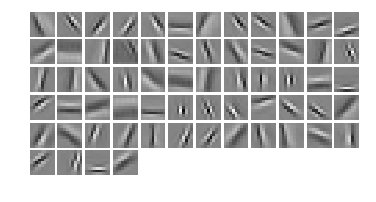

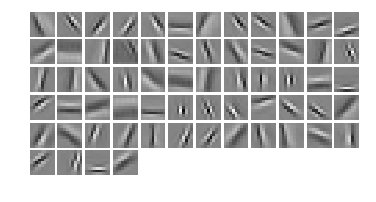

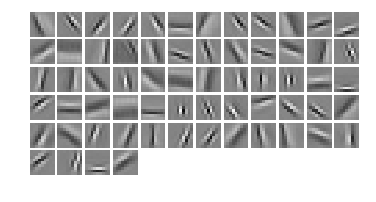

tensor(0.2238, device='cuda:0')


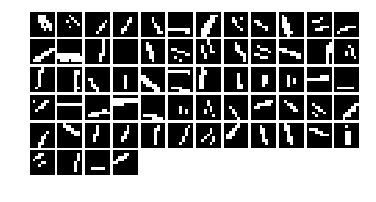

mean surface coverage 2LSPC : 12.33%


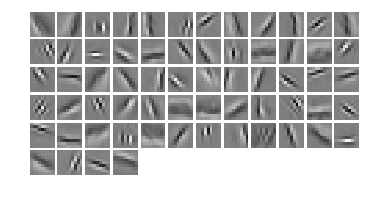

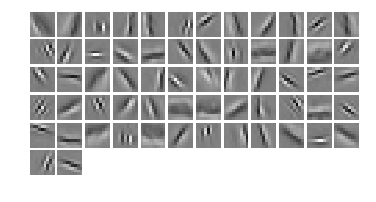

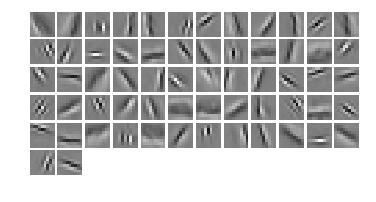

tensor(0.2071, device='cuda:0')


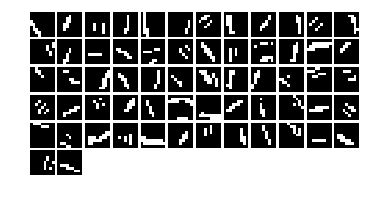

mean surface coverage HiLa : 11.09%


In [19]:
where = 'Savings/ATT/'
model_name = 'ATT_[0.5,1.0]_b=1.pkl'
path = where + model_name
with open(path, 'rb') as file:
    out = pickle.load(file)
Net = out['Net']

std1 = 0.2238
std2 = 0.2071

crit0 =(std1+std2)/2
grid_param = {'padding':1, 'normalize':True, 
                            'pad_value':1, 
                            'nrow':12, 'scale_each':False}
dico1 = Net.layers[0].dico.clone()
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

filt_2LSPC = torch.arange(64)
#filt_2LSPC = torch.cat([filt_2LSPC[0:4], filt_2LSPC[6+1:8], filt_2LSPC[8+1:10], filt_2LSPC[10+1:13], \
#                        filt_2LSPC[15+1:27],filt_2LSPC[27+1:30],filt_2LSPC[31+1:37],filt_2LSPC[37+1:39],\
#                        filt_2LSPC[39+1:45],filt_2LSPC[45+1:52],filt_2LSPC[53+1:56], filt_2LSPC[56+1:62],\
#                        filt_2LSPC[63+1:65],filt_2LSPC[65+1:68],filt_2LSPC[68+1:72], filt_2LSPC[72+1:76],\
#                        filt_2LSPC[77+1:83],filt_2LSPC[83+1:94],filt_2LSPC[94+1:96], filt_2LSPC[97+1:104],\
#                        filt_2LSPC[104+1:122], filt_2LSPC[123+1:-1]])
#dico1 = dico1[filt_2LSPC]

img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

#dico1_bw = torch.mean(dico1,dim=1).unsqueeze(1)
#dico1_bw = 1/dico1
#dico1 = 1 - dico1
dico1_bw = dico1/dico1.max()
#dico1_bw = dico1/dico1_bw.max()
img2 = make_grid(dico1_bw,**grid_param)
plot_L2 = show(img2.cpu())

print(dico1_bw.std())

dico1_binarized = dico1_bw.clone()
crit = 1.5*dico1_binarized.std()

#dico1_binarized[dico1_binarized < 0.15] = 0
#dico1_binarized[dico1_binarized >= 0.15] = 1

dico1_binarized[dico1_binarized >= crit0] = 1
dico1_binarized[dico1_binarized < crit0] = 0
img2 = make_grid(dico1_binarized,**grid_param)
plot_L2 = show(img2.cpu())



msc = dico1_binarized.mean()
print('mean surface coverage 2LSPC : {0:0.2f}%'.format(msc*100))

where = 'Savings/ATT/'
model_name = 'ATT_[0.5,1.0]_b=0.pkl'
path = where + model_name
with open(path, 'rb') as file:
    out = pickle.load(file)
Net = out['Net']

grid_param = {'padding':1, 'normalize':True, 
                            'pad_value':1, 
                            'nrow':12, 'scale_each':False}
dico1 = Net.layers[0].dico.clone()
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())


filt_HiLa = torch.arange(64)
filt_HiLa = torch.cat([filt_HiLa[0:56], filt_HiLa[56+1:-1]])
dico1 = dico1[filt_HiLa]
img2 = make_grid(dico1,**grid_param)
plot_L2 = show(img2.cpu())

#dico1_bw = torch.mean(dico1,dim=1).unsqueeze(1)
#dico1 = 1 - dico1
dico1_bw = dico1/dico1.max()
img2 = make_grid(dico1_bw,**grid_param)
plot_L2 = show(img2.cpu())

print(dico1_bw.std())

dico1_binarized = dico1_bw.clone()

dico1_binarized[dico1_binarized < crit0] = 0
dico1_binarized[dico1_binarized >= crit0] = 1
img2 = make_grid(dico1_binarized,**grid_param)
plot_L2 = show(img2.cpu())

msc = dico1_binarized.mean()
print('mean surface coverage HiLa : {0:0.2f}%'.format(msc*100))





